In [1]:
from vinum_analytica.data import WineDatasetManager # type: ignore
from vinum_analytica.models import TreeModel, RandomForestModel, NeuralNetworkModel # type: ignore
from vinum_analytica.visualization import Plotter # type: ignore
import json
dataset = WineDatasetManager()
dataset.load('../data/processed/test_classification.csv')
testset = dataset


In [2]:
tree = TreeModel.load('../models/tree_model.pkl')
forest = RandomForestModel.load('../models/random_forest_model.pkl')
neural = NeuralNetworkModel.load('../models/nn_model.pkl')

test_res = [{
    "model": "Decision Tree",
    "accuracy": tree.evaluate(testset)
}, {
    "model": "Random Forest",
    "accuracy": forest.evaluate(testset)
}, {
    "model": "Neural Network",
    "accuracy": neural.evaluate(testset)
}]


/home/paolo/Projects/WineReviewMining/wine_reviews_mining/src/models/nn_model.py:156: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_locatio

In [3]:
with open('../results/valid_res.json', 'r') as f:
    valid_res = json.load(f)

combined_results = []

for train, test in zip(valid_res, test_res):
    combined_results.append({
        "model": train['model'],
        "validation_accuracy": train['mean_accuracy'],
        "test_accuracy": test['accuracy']
    })

print(combined_results)

[{'model': 'Decision Tree', 'validation_accuracy': 0.3977370202223556, 'test_accuracy': 0.39871062076299346}, {'model': 'Random Forest', 'validation_accuracy': 0.5889037619140055, 'test_accuracy': 0.5925162833975808}, {'model': 'Neural Network', 'validation_accuracy': 0.5894023359754916, 'test_accuracy': 0.5996278080552971}]


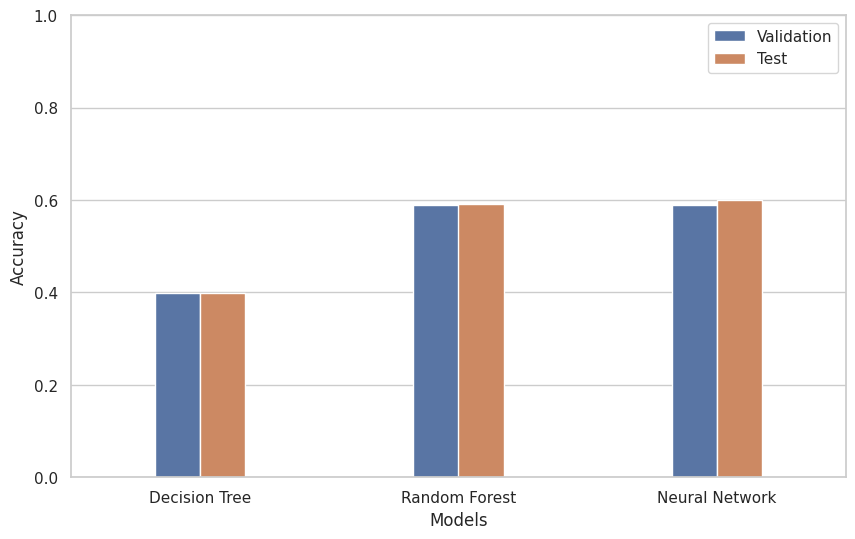

In [4]:
plotter = Plotter()
plotter.plot_validation_test_accuracy_comparison(combined_results, bar_width=0.35)

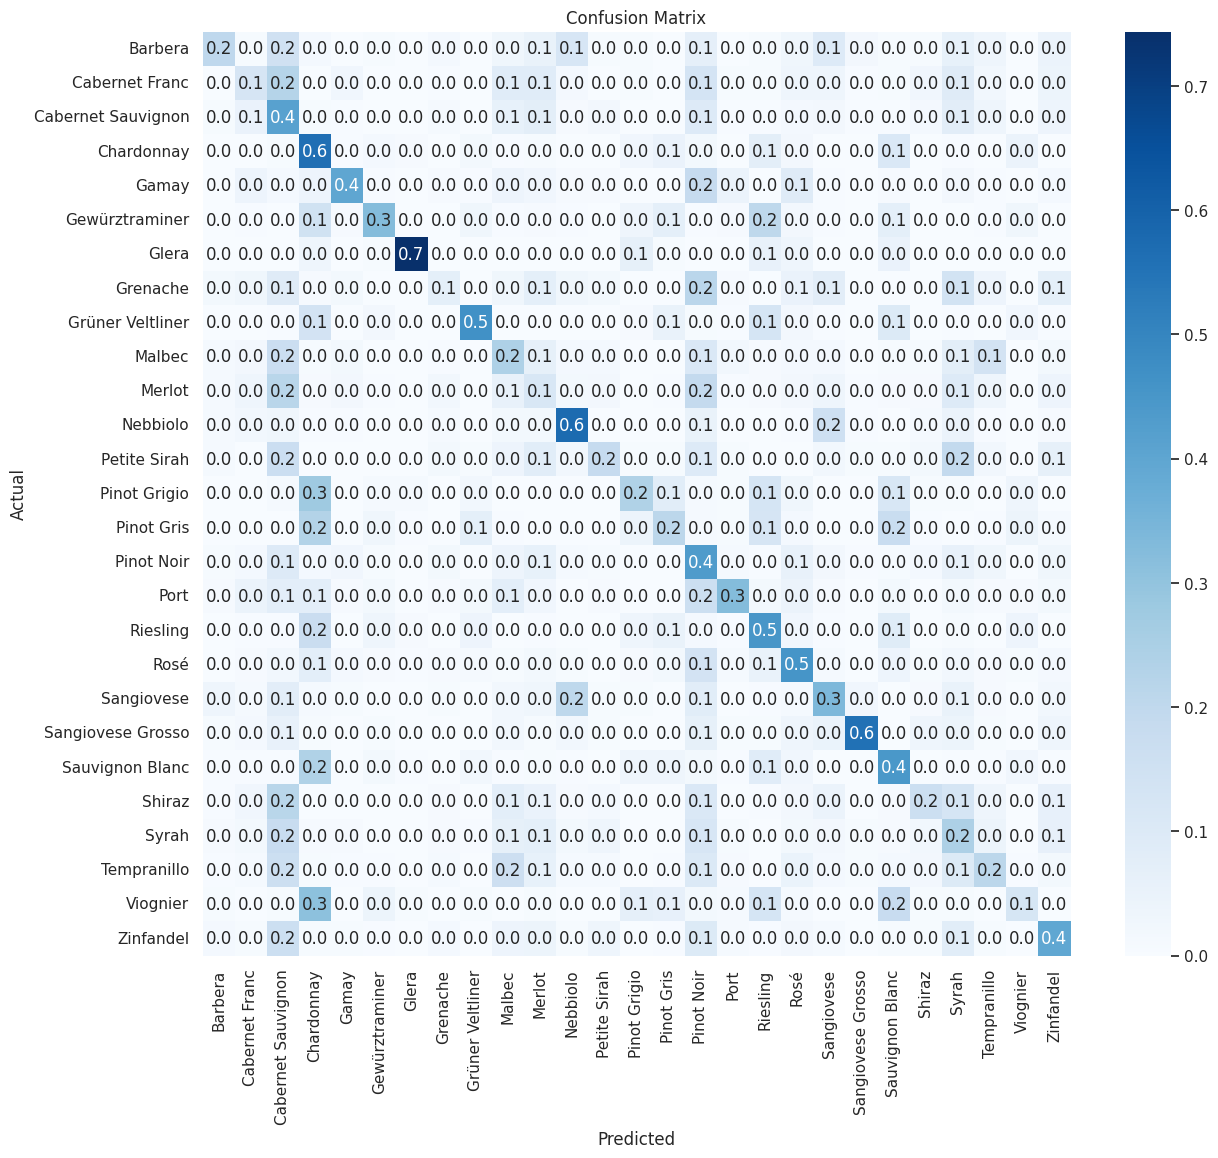

In [5]:
from sklearn.metrics import confusion_matrix

matrix = tree.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = neural.classes(), figsize=(14, 12))

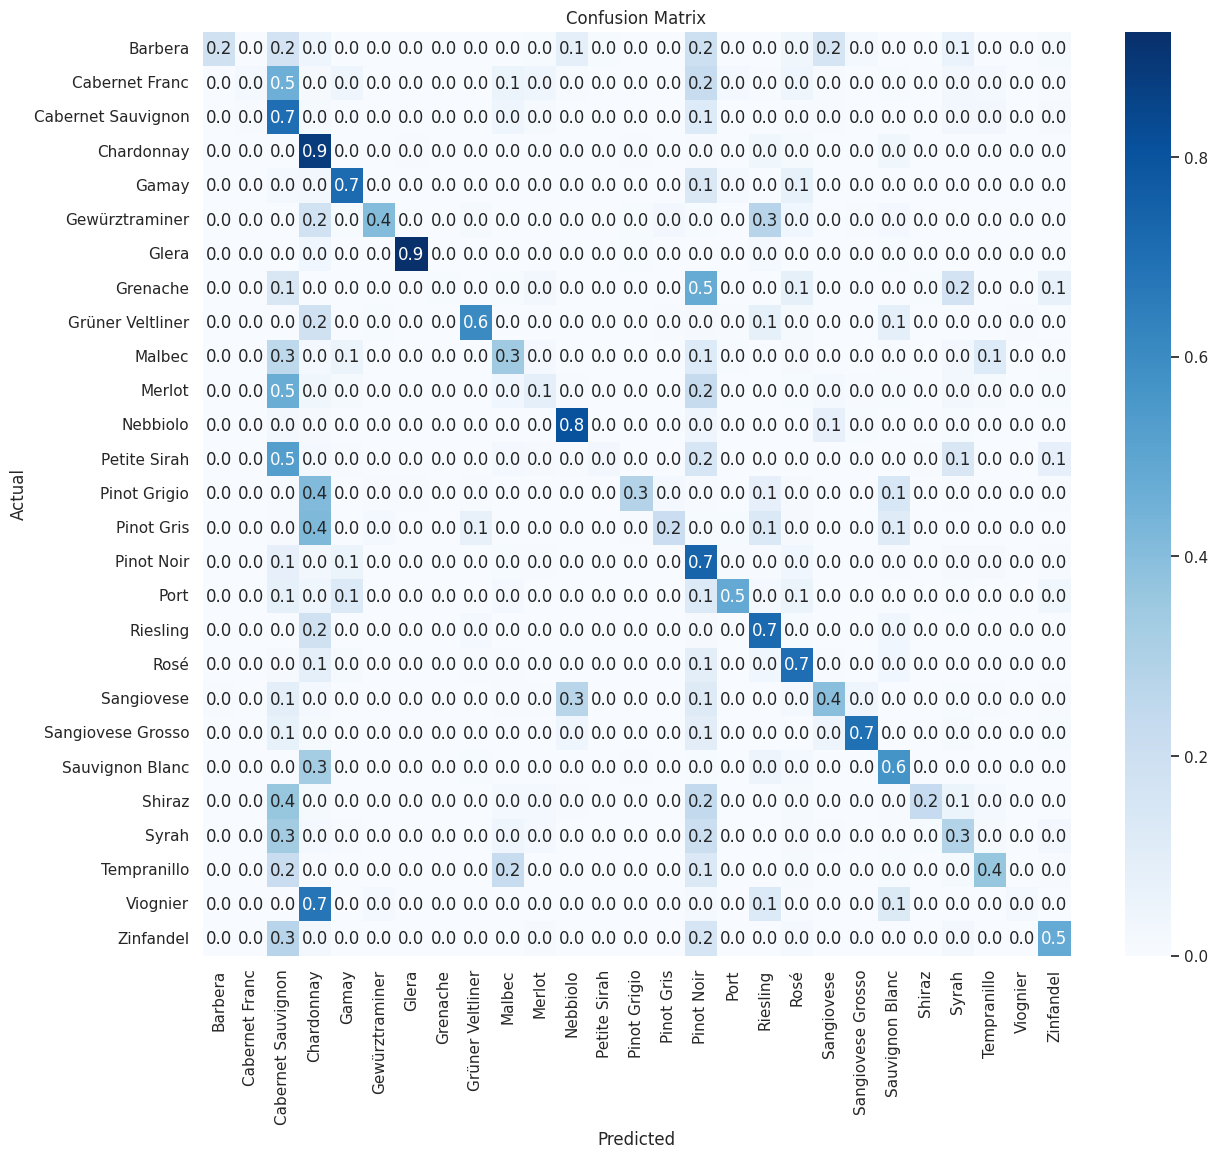

In [6]:
from sklearn.metrics import confusion_matrix

matrix = forest.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = forest.classes(), figsize=(14, 12))

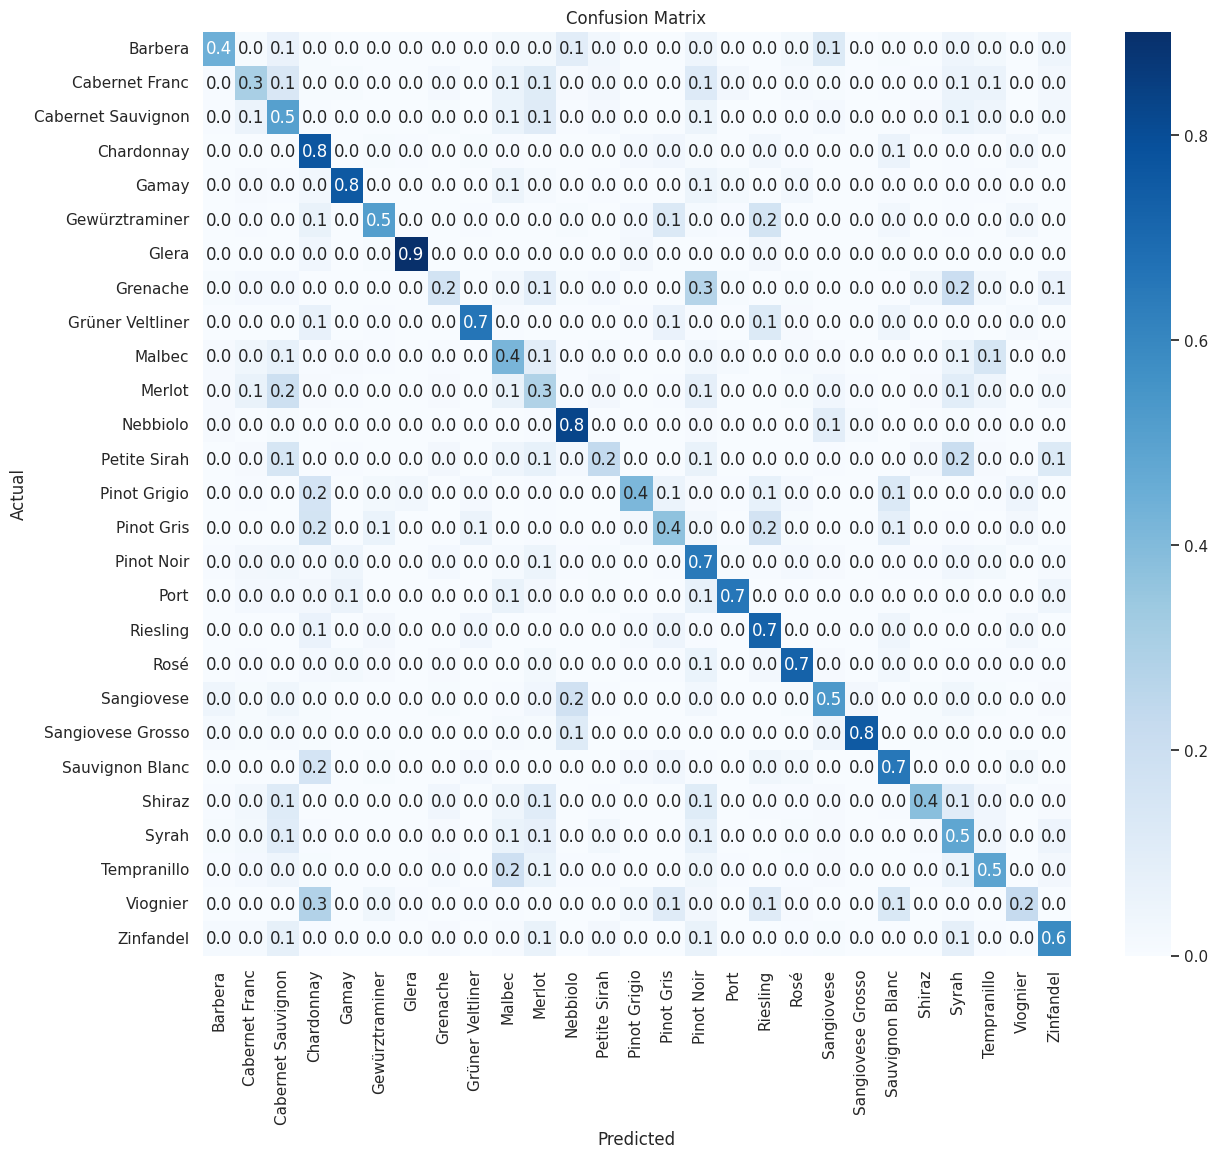

In [7]:
from sklearn.metrics import confusion_matrix

matrix = neural.evaluate(testset, metric=confusion_matrix, normalize='true')
plotter.plot_confusion_matrix(cm = matrix, classes = forest.classes(), figsize=(14, 12))